# Diabetes Detection

Problem Statement 

Diabetes is a type of chronic disease which is more common among the people of all age groups. Predicting this disease at an early stage can help a person to take the necessary precautions and change his/her lifestyle accordingly to either prevent the occurrence of this disease or control the disease(For people who already have the disease). 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
sns.__version__

'0.9.0'

Read Diabetes data

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\Diabetes\diabetes_data.csv')    
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
data.isnull().sum()    #check for null values

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Exploratory Data Analysis (EDA) 

In [4]:
data.shape

(520, 17)

In [5]:
data.describe()          #get staticstical analysis of the data

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [6]:
data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

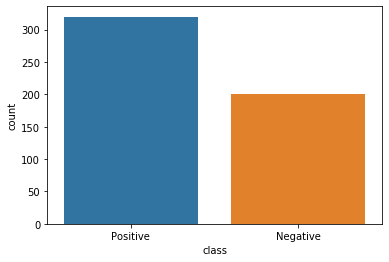

In [7]:
sns.countplot(data['class'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


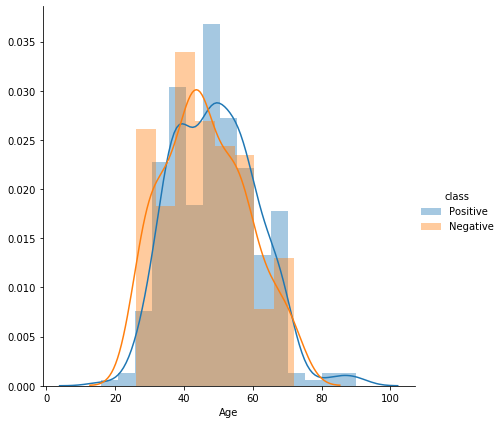

In [8]:
sns.FacetGrid(data,hue='class',size=6).map(sns.distplot,'Age').add_legend()

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


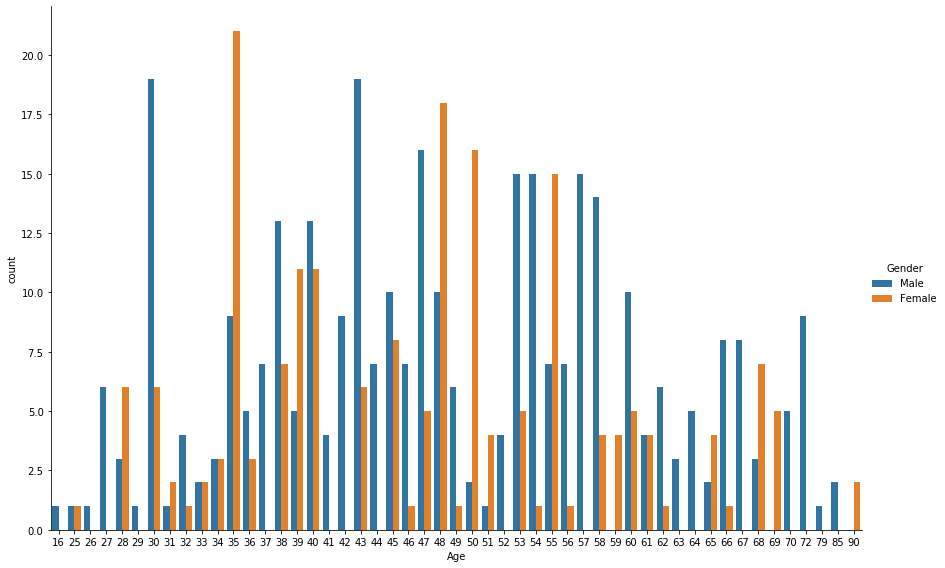

In [9]:
sns.catplot(x = 'Age',data = data,kind = 'count',hue='Gender',size=8,aspect=1.5)

Applying Label Encoder 

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns[1:] :
    data[i] = le.fit_transform(data[i])

data.head()    

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Spliting Independent and dependent variables

In [11]:
x=data.iloc[:,:-1].values
x

array([[40,  1,  0, ...,  1,  1,  1],
       [58,  1,  0, ...,  0,  1,  0],
       [41,  1,  1, ...,  1,  1,  0],
       ...,
       [58,  0,  1, ...,  1,  0,  1],
       [32,  0,  0, ...,  0,  1,  0],
       [42,  1,  0, ...,  0,  0,  0]], dtype=int64)

In [12]:
y=data.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

In [14]:
import joblib  
joblib.dump(sc,'transformrf')                                #saving the transformation

['transformrf']

In [15]:
x.shape

(520, 16)

In [16]:
y.shape

(520,)

## Spliting dataset into train and test 

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
x_train.shape

(416, 16)

In [19]:
x_test.shape

(104, 16)

In [20]:
y_train.shape

(416,)

In [21]:
y_test.shape

(104,)

## Model building 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV                 #To fing the best combination of hyper-parameters

In [23]:
rf = RandomForestClassifier()                    

In [24]:
n_estimators = [int(x) for x in np.linspace(5,100,10)]
max_depth = [int(x) for x in np.linspace(2,10,5)]
min_samples_leaf = [2,5,10]
criterion = ['entropy','gini']

In [25]:
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_leaf':min_samples_leaf,
               'criterion':criterion
              }
random_grid

{'n_estimators': [5, 15, 26, 36, 47, 57, 68, 78, 89, 100],
 'max_depth': [2, 4, 6, 8, 10],
 'min_samples_leaf': [2, 5, 10],
 'criterion': ['entropy', 'gini']}

In [26]:
rf_random= RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='accuracy', n_iter = 10, cv = 5,random_state=0)

In [27]:
rf_random.fit(x_train,y_train)                #fitting the data

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [28]:
rf_random.best_params_

{'n_estimators': 68,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

In [29]:
predictions = rf_random.predict(x_test)             #testing the model
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score              #checking the accuracy of the model
accuracy_score(y_test,predictions)

0.9615384615384616

In [31]:
joblib.dump(rf_random,'diabetes.save')             #saving the model

['diabetes.save']